<a href="https://colab.research.google.com/github/LavleenPDekatey/Unsupervised-Clustering-Netflix/blob/main/Netflix_movies_and_tv_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix movies and tv shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual (Lavleen Prabhakar Dekatey)

# **Project Summary -**

As a entertaiment content provider we would like to know the preference of consumers among all age groups which would be beneficial in providing filtered content which the consumer will like. But we will for now like to study the business case of Netflix as what type of content is available on netflix.

The objective of the project is to cluster the netflix dataset. In our dataset we have wide range of data relating to genres, producing country, releasing on, added on, description, cast, Director and rating.

We will be doing EDA, understanding what type of content is available in different countries and clustering similar content by matching text based features.

# **GitHub Link -**

https://github.com/LavleenPDekatey/Unsupervised-Clustering-Netflix.git

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/Almabetter Data science/Projects/project4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [ ]:
df=pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

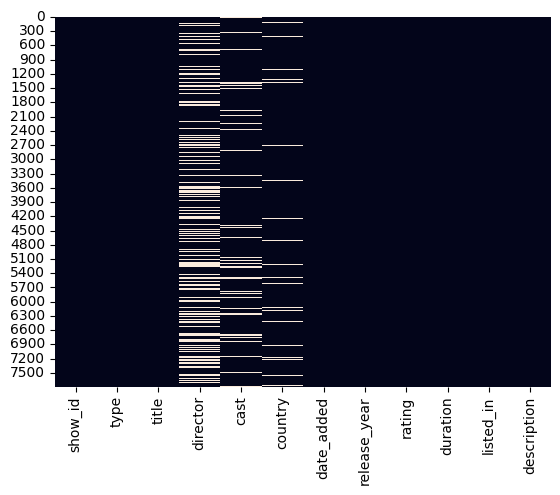

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset of netflix movies and tv shows on Netflix which says that whether the type is movie or tv show on netflix, Director, cast, producing country, released in year, date on which the show was added, duration of show and its corresponding description.

The above dataset has 7787 rows and 12 columns, There are few mising values like cast 718 ,country 507, date_added 10 and rating 7 but many of director column has missing values that is about 2389.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#replacing null values of cast with cast null string.
df['cast']=df['cast'].fillna('cast null')

In [ ]:
#replacing null values of country with mode of country column.
df['country']=df['country'].fillna(df['country'].mode()[0])

In [ ]:
#showing 5 rows of our data.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Showing count of each rating category.
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
#Dropping null values of rows corresponding to date added and rating.
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#replacing rating according to ages
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
#converting given dates into date time format
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
#extracting year from the date added column and putting it in year_added column
df['year_added']=df['date_added'].dt.year

In [ ]:
#extracting month from the date added column and putting it in month_added column
df['month_added']=df['date_added'].dt.month

In [ ]:
#making tv show type and movie type data separate
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [ ]:
#grouping rating according to show_id count
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count()

In [ ]:
#grouping rating according to target ages value vounts
count_of_target_ages=df.groupby(['rating'])['target_ages'].value_counts()
count_of_target_ages

rating    target_ages
G         Kids             39
NC-17     Adults            3
NR        Adults           83
PG        Older Kids      247
PG-13     Teens           386
R         Adults          665
TV-14     Teens          1928
TV-G      Kids            194
TV-MA     Adults         2861
TV-PG     Older Kids      804
TV-Y      Kids            279
TV-Y7     Older Kids      270
TV-Y7-FV  Older Kids        6
UR        Adults            5
Name: target_ages, dtype: int64

In [ ]:
#we are reseting index so that row one starts with index 0
movies.reset_index(inplace=True)

In [ ]:
movies

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added
0,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016,12
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018,12
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017,11
3,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020,1
4,6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,2020,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,2020,1
5368,7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,2020,10
5369,7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,2019,3
5370,7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,2020,9


In [ ]:
#extracting the integer value from the string in movies data
duration=[]
for i in range(len(movies['duration'])):
  duration.append(movies.iloc[i]['duration'].split(' ')[0])

In [ ]:
#converting the string into numerical value
movies['duration_of_movies']=pd.to_numeric(duration)

In [ ]:
#creating a copy of df
df1=df.copy()

In [ ]:
#dropping rows corresponding to null values in director column.
df1.dropna(subset=['director'], inplace=True)

In [ ]:
#showing shape of df1 data
df1.shape

(5394, 15)

In [ ]:
#again making movie type and tv shows type data separate from new altered dataset df1
movies1=df1[df1['type']=='Movie']

In [ ]:
tv_shows1=df1[df1['type']=='tv_shows']

In [ ]:
#we groupby director to know the top 10 count of director in movies data
top_10_movie_count_of_directors=movies1.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)

In [ ]:
#showing top 10 count of director
top_10_movie_count_of_directors

,director,count
2960,"Raúl Campos, Jan Suter",18
2233,Marcus Raboy,15
1545,Jay Karas,14
604,Cathy Garcia-Molina,13
1542,Jay Chapman,12
3865,Youssef Chahine,12
2298,Martin Scorsese,12
3470,Steven Spielberg,10
846,David Dhawan,9
1309,Hakan Algül,8


In [ ]:
#creating list of actors in movies by splitting with the help of ',' and combining the cast of movies
a=[]
for i in movies['cast']:
  a.extend(i.split(','))
print(a)

['Demián Bichir', ' Héctor Bonilla', ' Oscar Serrano', ' Azalia Ortiz', ' Octavio Michel', ' Carmen Beato', 'Tedd Chan', ' Stella Chung', ' Henley Hii', ' Lawrence Koh', ' Tommy Kuan', ' Josh Lai', ' Mark Lee', ' Susan Leong', ' Benjamin Lim', 'Elijah Wood', ' John C. Reilly', ' Jennifer Connelly', ' Christopher Plummer', ' Crispin Glover', ' Martin Landau', ' Fred Tatasciore', ' Alan Oppenheimer', ' Tom Kane', 'Jim Sturgess', ' Kevin Spacey', ' Kate Bosworth', ' Aaron Yoo', ' Liza Lapira', ' Jacob Pitts', ' Laurence Fishburne', ' Jack McGee', ' Josh Gad', ' Sam Golzari', ' Helen Carey', ' Jack Gilpin', 'Amina Khalil', ' Ahmed Dawood', ' Tarek Lotfy', ' Ahmed El Fishawy', ' Mahmoud Hijazi', ' Jihane Khalil', ' Asmaa Galal', ' Tara Emad', 'Samuel L. Jackson', ' John Heard', ' Kelly Rowan', ' Clifton Collins Jr.', ' Tony Plana', 'Divya Dutta', ' Atul Kulkarni', ' Mohan Agashe', ' Anupam Shyam', ' Raayo S. Bakhirta', ' Yashvit Sancheti', ' Greeva Kansara', ' Archan Trivedi', ' Rajiv Patha

In [ ]:
#creating a dataframe of list of actors
other_movies=pd.DataFrame(a, columns=['actor'])

In [ ]:
#we are taking the count of actor to know the top 10 count of actors in movies
topactorsofmovies=other_movies['actor'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False).rename(columns={'index':'actor'})
top_10_movie_actors=topactorsofmovies[1:11]
top_10_movie_actors

,actor,count
1,Anupam Kher,37
2,Shah Rukh Khan,27
3,Om Puri,27
4,Boman Irani,25
5,Paresh Rawal,24
6,Akshay Kumar,22
7,Kareena Kapoor,20
8,Adam Sandler,19
12,Naseeruddin Shah,18
11,Amitabh Bachchan,18


In [ ]:
#creating list of actors in tv shows by splitting with the help of ',' and combining the cast of tv shows
b=[]
for i in tv_shows['cast']:
  b.extend(i.split(','))
print(b)

['João Miguel', ' Bianca Comparato', ' Michel Gomes', ' Rodolfo Valente', ' Vaneza Oliveira', ' Rafael Lozano', ' Viviane Porto', ' Mel Fronckowiak', ' Sergio Mamberti', ' Zezé Motta', ' Celso Frateschi', 'Erdal Beşikçioğlu', ' Yasemin Allen', ' Melis Birkan', ' Saygın Soysal', ' Berkan Şal', ' Metin Belgin', ' Ayça Eren', ' Selin Uludoğan', ' Özay Fecht', ' Suna Yıldızoğlu', 'Robert Więckiewicz', ' Maciej Musiał', ' Michalina Olszańska', ' Andrzej Chyra', ' Clive Russell', ' Zofia Wichłacz', ' Edyta Olszówka', ' Mateusz Kościukiewicz', ' Ewa Błaszczyk', ' Vu Le Hong', ' Tomasz Włosok', ' Krzysztof Wach', 'cast null', 'Shahd El Yaseen', ' Shaila Sabt', ' Hala', ' Hanadi Al-Kandari', ' Salma Salem', ' Ibrahim Al-Harbi', ' Mahmoud Boushahri', ' Yousef Al Balushi', ' Ghorour', ' Abdullah Al-bloshi', 'Bryson Baugus', ' Emily Neves', ' Blake Shepard', ' Patrick Poole', ' Luci Christian', ' Adam Gibbs', ' Masakazu Morita', ' Fumiko Orikasa', ' Takahiro Sakurai', ' Hiroaki Miura', ' Satomi Sa

In [ ]:
#converting the list of actors in tv shows into dataframe
other_tvshows=pd.DataFrame(b, columns=['actor'])

In [ ]:
#we are taking the count of actor to know the top 10 count of actors in tv shows
topactorsoftvshows=other_tvshows['actor'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False).rename(columns={'index':'actor'})
top_10_tvshow_actors=topactorsoftvshows[1:11]
top_10_tvshow_actors

,actor,count
1,Takahiro Sakurai,22
2,Ai Kayano,15
3,Junichi Suwabe,15
4,Yuki Kaji,15
5,David Attenborough,13
6,Daisuke Ono,13
7,Yoshimasa Hosoya,12
8,Kana Hanazawa,12
11,Vincent Tong,11
9,Tomokazu Sugita,11


In [ ]:
#we groupby country to know the top 10 count of countries involved in production of movies
top_10_country_number_of_movies=movies.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)

In [ ]:
#showing top 10 count of countries involved in production of movies
top_10_country_number_of_movies

,country,count
475,United States,2076
195,India,852
399,United Kingdom,193
44,Canada,118
346,Spain,89
115,Egypt,89
387,Turkey,73
299,Philippines,70
122,France,69
251,Japan,69


In [ ]:
#we groupby country to know the top 10 count of countries involved in production of tv shows
top_10_country_number_of_tvshows=tv_shows.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)

In [ ]:
#showing top 10 count of countries involved in production of tv shows
top_10_country_number_of_tvshows

,country,count
151,United States,975
132,United Kingdom,203
77,Japan,155
112,South Korea,147
63,India,71
124,Taiwan,68
14,Canada,59
44,France,46
117,Spain,45
3,Australia,44


In [ ]:
#showing count of year in which the tv show or movie was added on netflix
df['year_added'].value_counts()

2019    2153
2020    2009
2018    1684
2017    1222
2016     440
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: year_added, dtype: int64

In [ ]:
#which is the recent year of release
df['release_year'].max()

2021

In [ ]:
#movies released in recent year
movie_release_year_2021=movies[movies['release_year']==2021]

In [ ]:
#we groupby country to know which country has produced a movie which is released in the recent year
released_movie_recent_year=movie_release_year_2021.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [ ]:
#tv shows released in recent year
tvshow_release_year_2021=tv_shows[tv_shows['release_year']==2021]

In [ ]:
#we groupby country to know which country has produced a tv show which is released in the recent year
released_tvshow_recent_year=tvshow_release_year_2021.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [ ]:
#we groupby year added to know the count of movies in year added
year_movies_added=movies.groupby(['year_added'])['show_id'].count().reset_index(name='count').sort_values(by='year_added',ascending=True)

In [ ]:
#show count of movies added according to year
year_movies_added

,year_added,count
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,19
7,2015,58
8,2016,256
9,2017,861


In [ ]:
##we groupby year added to know the count of tv shows in year added
year_tvshows_added=tv_shows.groupby(['year_added'])['show_id'].count().reset_index(name='count').sort_values(by='year_added',ascending=True)

In [ ]:
#show count of tv shows added according to year
year_tvshows_added

,year_added,count
0,2008,1
1,2013,5
2,2014,6
3,2015,30
4,2016,184
5,2017,361
6,2018,429
7,2019,656
8,2020,697
9,2021,29


In [ ]:
#we groupby month added to know the count of movies in each month
movie_monthly_added=movies.groupby(['month_added'])['show_id'].count().reset_index(name='count').sort_values(by='month_added',ascending=True)

In [ ]:
#show count of movies added according to month
movie_monthly_added

,month_added,count
0,1,559
1,2,328
2,3,470
3,4,419
4,5,371
5,6,377
6,7,403
7,8,413
8,9,414
9,10,553


In [ ]:
#we groupby month added to know the count of tv shows in each month
tv_shows_monthly_added=tv_shows.groupby(['month_added'])['show_id'].count().reset_index(name='count').sort_values(by='month_added',ascending=True)

In [ ]:
#show count of tv shows added according to month
tv_shows_monthly_added

,month_added,count
0,1,197
1,2,143
2,3,198
3,4,181
4,5,172
5,6,165
6,7,197
7,8,204
8,9,204
9,10,232


In [ ]:
#we groupby listed in that is genre to know the top 10 genres
Top_10_genres=df['listed_in'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False).rename(columns={'index':'Genres'}).head(10)

In [ ]:
#we groupby target ages and country to know the count of country corresponding to target ages
country_target_ages_count=df.groupby(['target_ages','country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False).head(10)

In [ ]:
#show count of country corresponding to target ages
country_target_ages_count

,target_ages,country,count
341,Adults,United States,1440
862,Teens,United States,742
625,Older Kids,United States,596
740,Teens,India,524
476,Kids,United States,273
135,Adults,India,236
285,Adults,United Kingdom,203
551,Older Kids,India,148
246,Adults,Spain,112
241,Adults,South Korea,86


In [ ]:
#creating an array count of country corresponding to target ages
lst=np.array(country_target_ages_count['count'])

In [ ]:
#creating a crosstab for making a heatmap
heatmap=pd.crosstab(country_target_ages_count['target_ages'],country_target_ages_count['country'],values=lst,aggfunc=sum,normalize='index')

In [ ]:
#filling null values with 0
heatmap=heatmap.fillna(0)
heatmap

country,India,South Korea,Spain,United Kingdom,United States
target_ages,,,,,
Adults,0.113625,0.041406,0.053924,0.097737,0.693308
Kids,0.000000,0.000000,0.000000,0.000000,1.000000
Older Kids,0.198925,0.000000,0.000000,0.000000,0.801075
Teens,0.413902,0.000000,0.000000,0.000000,0.586098


In [ ]:
countries=['India', 'South Korea', 'Spain', 'United Kingdom', 'United States']
ages=['Adults','Kids','Older Kids','Teens']

In [ ]:
#we groupby rating to know what is the mean duration of movies corresponding to different rating categories
duration_year = movies.groupby(['rating'])['duration_of_movies'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('duration_of_movies')

### What all manipulations have you done and insights you found?

1) Replacing null values of cast with cast null string, replaced null value of country with mode of country column and dropped null values of rows corresponding to date added and rating.

2) Replaced rating according to ages to which the rating belongs.

3) Converted date into datetime format and extracted year and month from it.

4) Grouping rating according to target ages we got to know TV-MA has maximum number of counts.

5) Extracted the numeric value from the duration of movies.

6) We dropped the null value rows considering director column, grouped the director column according to show_id and from it we came to know directors maximum count in movies.

7) We combine the cast of movies and TV shows and took the maximum count of actor to know the most preferred actor. Now we know Anupam Kher is the most preffered actor in movies and Takahiro Sakurai is the most preferred actor in TV shows.

8) United States is the topmost producing country considering the number of count of movies and TV shows.

9) In 2019, there were maximum number of movies added and in 2020 there were maximum number of TV shows added.

10) Ending three months of the year and starting 1 month had maximum count of movies added.

11) Last 1 month of the year had maximum count of TV shows added.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Count of ratings')

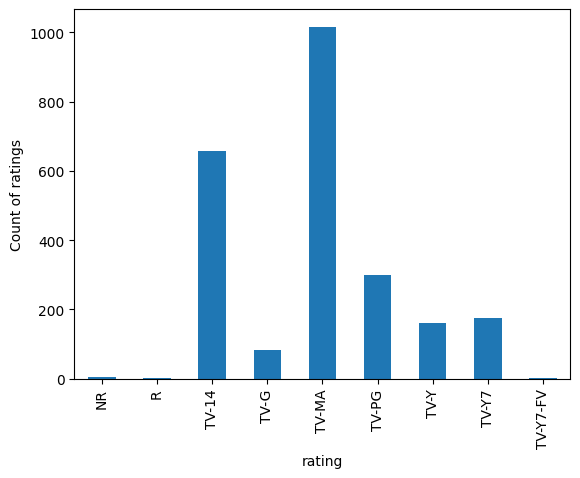

In [ ]:
# Chart - 1 visualization code
tv_ratings.plot(kind='bar')
plt.ylabel('Count of ratings')

##### 1. Why did you pick the specific chart?

We used bar chart as it is suitable for representing categorical variable with its corresponding count.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that TV-MA rating which is for the adult age group has the maximum count among the TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The TV-MA rating is the first highest which is for adults, TV-14 is the second highest which is for Teens and TV-PG is for older kids which means that netflix covers majority of the elder people watching preference of TV shows which is good for the netflix.

#### Chart - 2

<Axes: xlabel='rating,target_ages'>

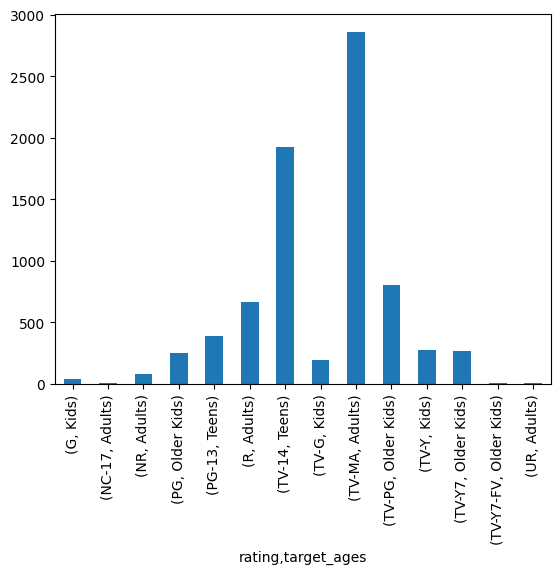

In [ ]:
# Chart - 2 visualization code
count_of_target_ages.plot(kind='bar')

##### 1. Why did you pick the specific chart?

We used bar chart as bar charts are good for representing categorical variables with its corresponding counts.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that TV-MA rating which is for the adult age group has the maximum count among both types of netflix content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that the content provided of both type which is for the majority of elders which is good for the business.

#### Chart - 3

<BarContainer object of 10 artists>

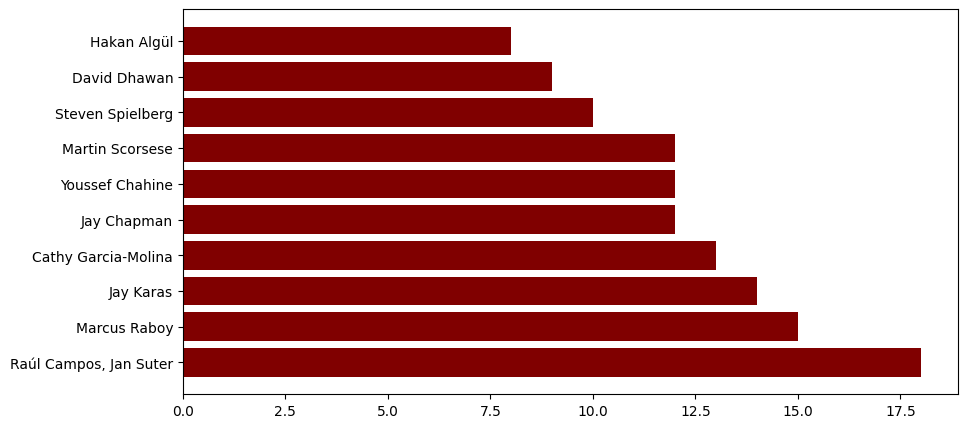

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
plt.barh(top_10_movie_count_of_directors['director'],top_10_movie_count_of_directors['count'], color='maroon')

##### 1. Why did you pick the specific chart?

We used horizontal bar chart as it is good in representing top counts of person.

##### 2. What is/are the insight(s) found from the chart?

We found the insight from the chart that Raul Campos and Jan Suter are the topmost director considering the count of movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We now know that the content in movies prefer which directors the most which might possibly make the movie a hit.

#### Chart - 4

<BarContainer object of 10 artists>

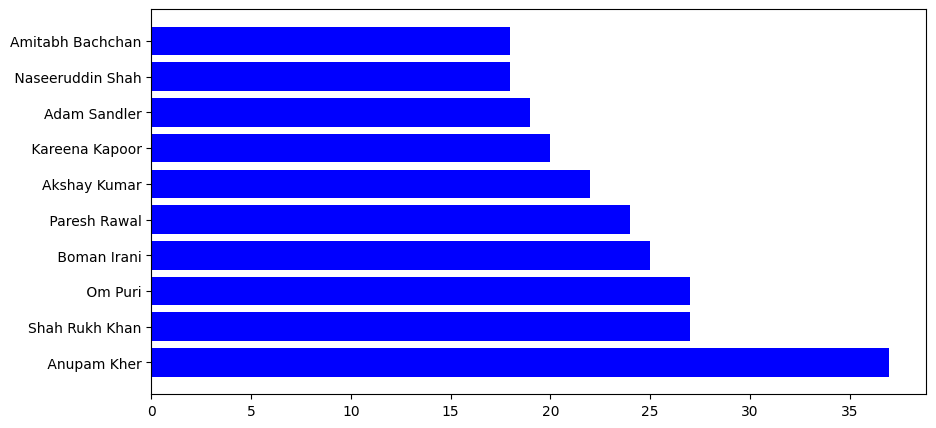

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
plt.barh(top_10_movie_actors['actor'],top_10_movie_actors['count'],color='blue')

##### 1. Why did you pick the specific chart?

We used horizontal bar chart as it is good in representing top counts of person.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that Anupam Kher is the topmost actor considering the count of movies in which Anupam Kher acted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We now know which actors are prefered the most in making of movie which might possibly make a movie hit.

#### Chart - 5

<BarContainer object of 10 artists>

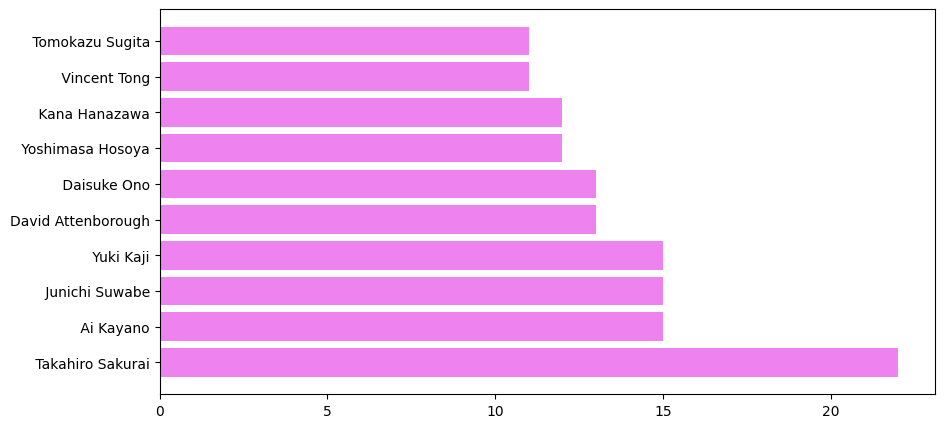

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
plt.barh(top_10_tvshow_actors['actor'],top_10_tvshow_actors['count'], color='violet')

##### 1. Why did you pick the specific chart?

We used horizontal bar chart as it is good in representing top counts of person.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that Takahiro Sakurai is the topmost actor considering the count of TV shows in which the actor acted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We now know which actors are prefered the most in making of TV shows which will possibly make the TV show hit.

#### Chart - 6

<BarContainer object of 10 artists>

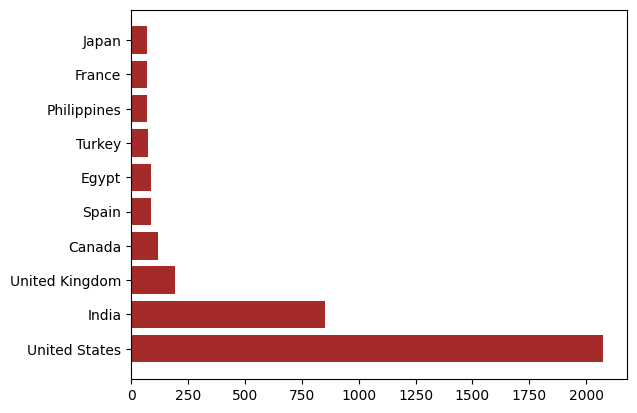

In [ ]:
# Chart - 6 visualization code
plt.barh(top_10_country_number_of_movies['country'],top_10_country_number_of_movies['count'],color='brown')

##### 1. Why did you pick the specific chart?

We used horizontal bar chart which is good in representing categorical variable along y axis and its corresponding count along x axis.

##### 2. What is/are the insight(s) found from the chart?

We got the insight that united states produces movies which are in majority that is the count is highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Now we  know which country produces the highest number of movies which will give us idea which country has the scope of production of movies.

#### Chart - 7

<BarContainer object of 10 artists>

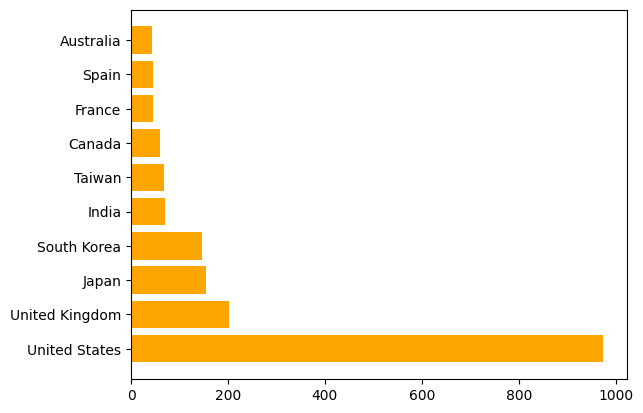

In [ ]:
# Chart - 7 visualization code
plt.barh(top_10_country_number_of_tvshows['country'],top_10_country_number_of_tvshows['count'],color='orange')

##### 1. Why did you pick the specific chart?

We used horizontal bar chart which is good in representing categorical variable along y axis and its corresponding count along x axis.

##### 2. What is/are the insight(s) found from the chart?

We got the insight that United States produces TV shows which are in majority that is the count is highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Now we know which country produces the highest number of TV shows which will give us idea which country has the scope of production of TV shows.

#### Chart - 8

([0, 1, 2, 3],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada, United States, Cayman Islands'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Turkey')])

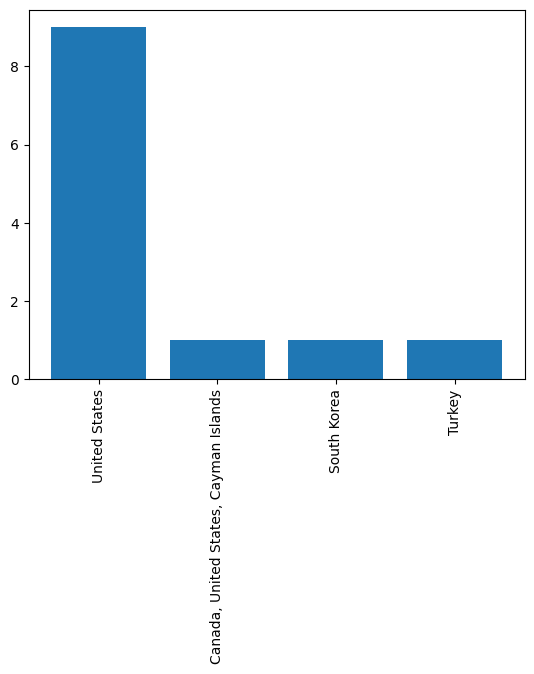

In [ ]:
# Chart - 8 visualization code
plt.bar(released_movie_recent_year['country'],released_movie_recent_year['count'])
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

We used bar chart as it is good in representing categorical variable with its corresponding count.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that United States have the highest number of releases compared to other countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Now we know that the movies released in the recent year So there is more movie content for the consumer on netflix giving consumer wide variety of choices.

#### Chart - 9

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Mexico'),
  Text(3, 0, 'Mexico, United States'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'United Kingdom, Canada, United States')])

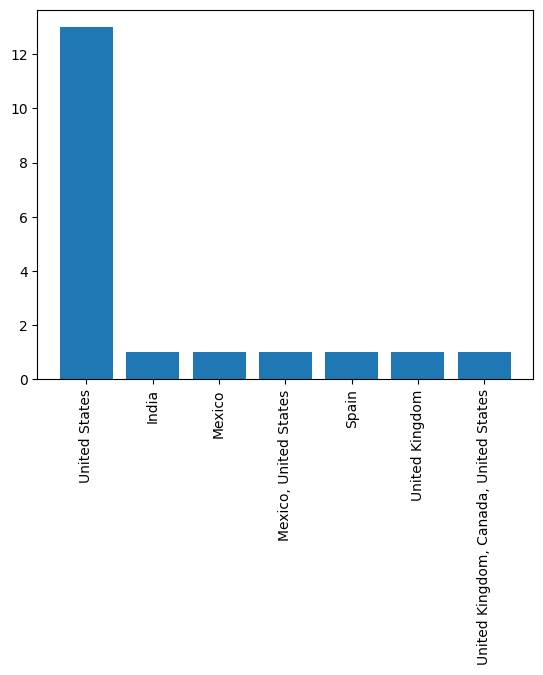

In [ ]:
# Chart - 9 visualization code
plt.bar(released_tvshow_recent_year['country'],released_tvshow_recent_year['count'])
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

We used bar chart as it is good in representing categorical variable with its corresponding count.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that United States have the highest number of releases compared to other countries

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Now we know that the TV shows released in the recent year So there is more TV show content for the consumer on netflix giving consumer wide variety of choices.

#### Chart - 10

<BarContainer object of 14 artists>

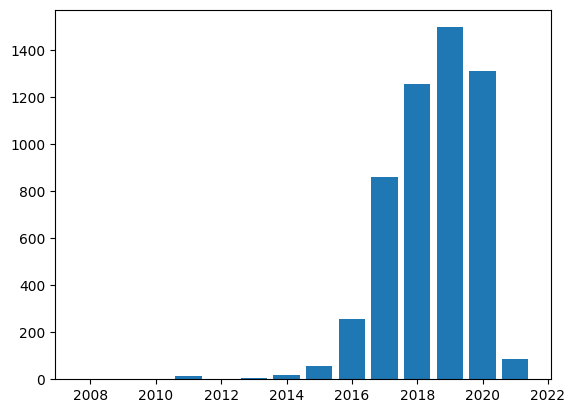

In [ ]:
# Chart - 10 visualization code
plt.bar(year_movies_added['year_added'],year_movies_added['count'])

##### 1. Why did you pick the specific chart?

We used bar chart as it is good for representing category which in our case is years and corresponding to it is given count.

##### 2. What is/are the insight(s) found from the chart?

We gained the insight that upto year 2019 the movies added were increasing but from 2020 the movies added were declining maybe due to pandemic.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is a negative growth from 2020 as there is a decline in the movies being added.

#### Chart - 11

<BarContainer object of 10 artists>

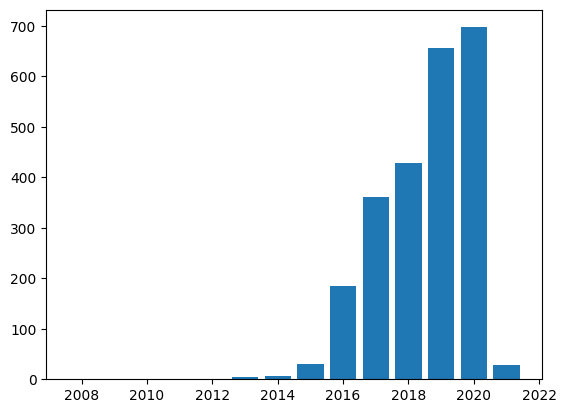

In [ ]:
# Chart - 11 visualization code
plt.bar(year_tvshows_added['year_added'],year_tvshows_added['count'])

##### 1. Why did you pick the specific chart?

We used bar chart as it is good for representing category which in our case is years and corresponding to it is given count of TV shows added.

##### 2. What is/are the insight(s) found from the chart?

We gained the insight that upto year 2020 the TV shows added were increasing but from 2021 the TV shows added were declining maybe due to pandemic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is a negative growth from 2021 as there is a decline in the TV shows being added

#### Chart - 12

<BarContainer object of 12 artists>

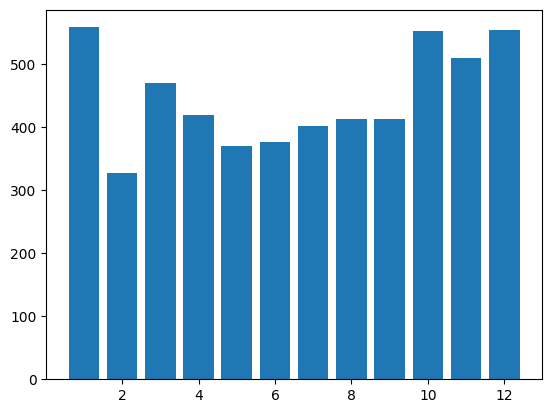

In [ ]:
# Chart - 12 visualization code
plt.bar(movie_monthly_added['month_added'],movie_monthly_added['count'])

##### 1. Why did you pick the specific chart?

We used bar chart as it is good for representing category which in our case is month and corresponding to it is given count.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that last three month of the year and starting one month of the year has the highest count of movies added.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight says we will have consumers of the movies content during the four months more during which we can run adds to have more business growth.

#### Chart - 13

<BarContainer object of 12 artists>

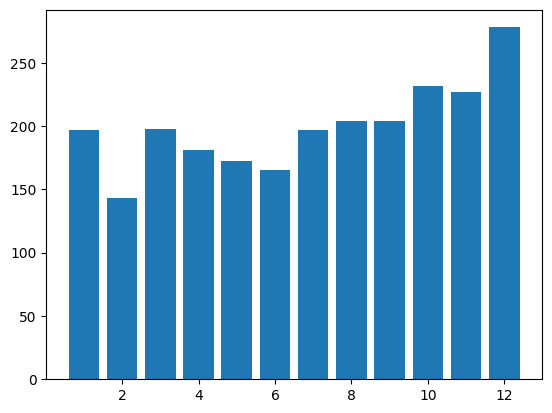

In [ ]:
# Chart - 13 visualization code
plt.bar(tv_shows_monthly_added['month_added'],tv_shows_monthly_added['count'])

##### 1. Why did you pick the specific chart?

We used bar chart as it is good for representing category which in our case is month and corresponding to it is given count

##### 2. What is/are the insight(s) found from the chart?

We found the insight that last month of the year  has the highest count of TV shows added.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight says we will have consumers of the TV shows content during the last month more during which we can run adds to have more business growth.

#### Chart - 14

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Documentaries'),
  Text(1, 0, 'Stand-Up Comedy'),
  Text(2, 0, 'Dramas, International Movies'),
  Text(3, 0, 'Comedies, Dramas, International Movies'),
  Text(4, 0, 'Dramas, Independent Movies, International Movies'),
  Text(5, 0, "Kids' TV"),
  Text(6, 0, 'Children & Family Movies'),
  Text(7, 0, 'Documentaries, International Movies'),
  Text(8, 0, 'Children & Family Movies, Comedies'),
  Text(9, 0, 'Comedies, International Movies')])

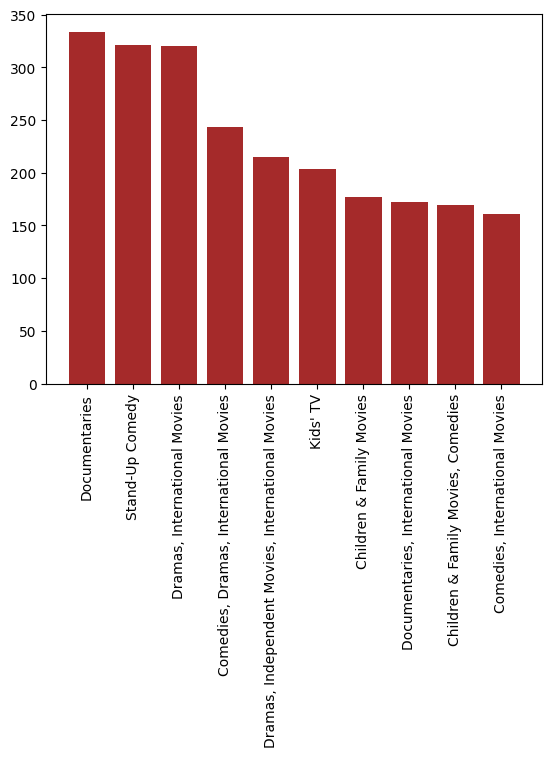

In [ ]:
plt.bar(Top_10_genres['Genres'],Top_10_genres['count'],color='brown')
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

We used the bar chart as it is good for representing categories with corresponding counts of movies

##### 2. What is/are the insight(s) found from the chart?

We found the insight that documentary content have the highest count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have the documentary content more compared to others, standup comedies the second highest and Dramas, International movies the third highest which says the consumers have wide range of categories of movies and TV shows genres.

#### Chart - 15

<Axes: xlabel='duration_of_movies'>

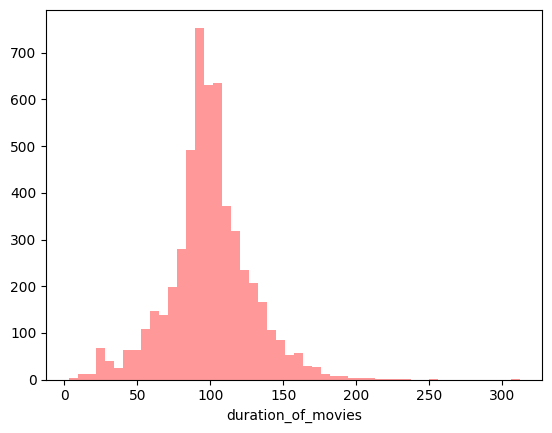

In [ ]:
sns.distplot(movies['duration_of_movies'],kde=False, color=['red'])

##### 1. Why did you pick the specific chart?

We used distplot to know the distribution of values of duration of movies.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is movies around 90 min duration have the majority of count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The movie content provided on netflix is around 90min. This duration can be taken into consideration and getting the data of consumers we can predict the preferable movies the consumer would like to have.

#### Chart - 16

Text(0.5, 1.0, 'count_of_tv_show_duration')

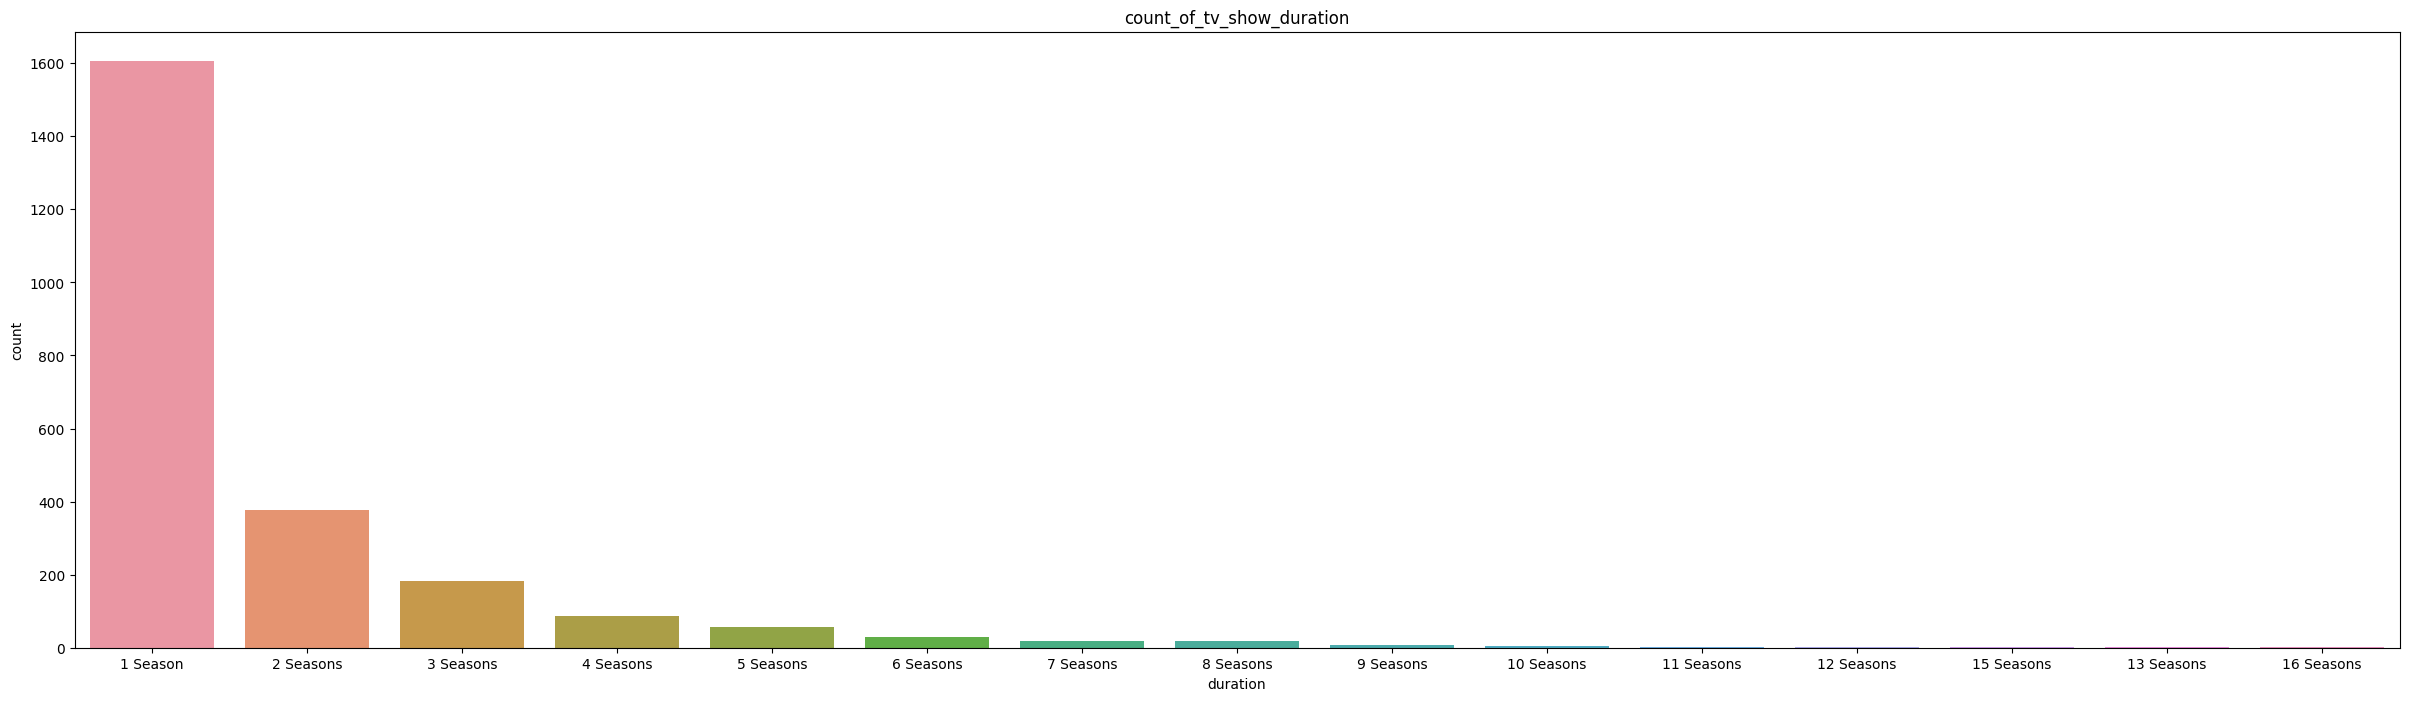

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)
plt.title('count_of_tv_show_duration')

##### 1. Why did you pick the specific chart?

We used bar chart as it is good for representing category with corresponding count.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that season 1 of TV shows has more number of counts compared to other season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We came to know as we move towards the further seasons the number of count is decreasing which is correct but this shows that we are unable to extend the TV shows longer.

#### Chart - 17

<Axes: xlabel='rating', ylabel='duration_of_movies'>

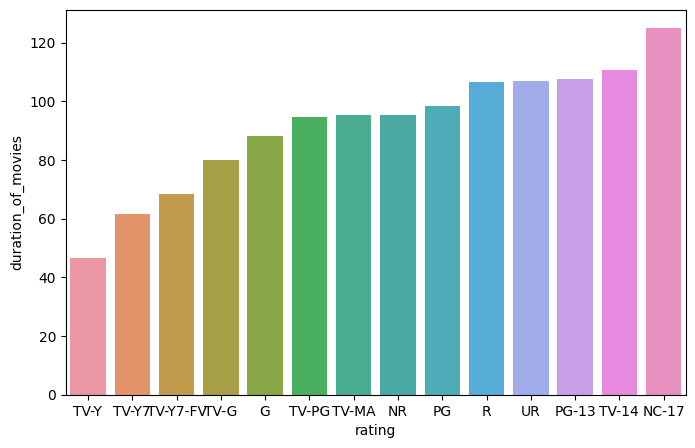

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=duration_df.index, y=duration_df.duration_of_movies)

##### 1. Why did you pick the specific chart?

We used bar chart as it is good for representing category with corresponding count.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that NC-17 rating movies which is for adults, the duration of movies are maximum.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Now we know the duration of movie content is maximum for adults which says consumers of adult age are given content of longer duration for which they might be interested.

#### Chart - 18 - Correlation Heatmap

<Axes: xlabel='country', ylabel='target_ages'>

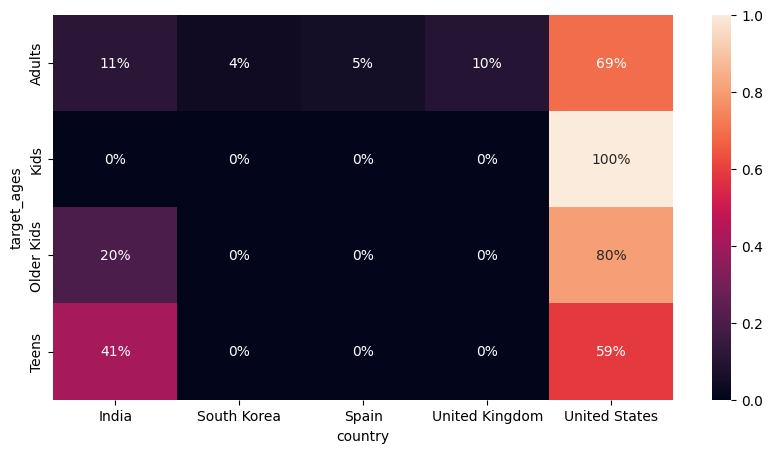

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
sns.heatmap(data=heatmap.loc[ages, countries],fmt='1.0%',annot=True)

##### 1. Why did you pick the specific chart?

We used heatmap as it gives the correlation of one with respect to other.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that United States have the maximum number of content for all the age groups by providing wide range of choices.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. movies rated for kids and older kids are at least two hours long.
2. The duration which is more than 90 mins are NOT movies

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
duration_and_target_ages=movies[['duration_of_movies','target_ages']].groupby(by='target_ages')

In [ ]:
duration_and_target_ages

In [ ]:
target_age_and_duration=duration_and_target_ages.mean().reset_index()

In [ ]:
target_age_and_duration

,target_ages,duration_of_movies
0,Adults,98.275145
1,Kids,66.486891
2,Older Kids,92.024648
3,Teens,110.025332


In [ ]:
#We are grouping values of duration and target ages.
A=duration_and_target_ages.get_group('Kids')
B=duration_and_target_ages.get_group('Older Kids')

In [ ]:
#Calculating mean and standard deviation for kids and older kids
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

In [ ]:
print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration_of_movies    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration_of_movies    92.024648
dtype: float64
Std for  movies rated for Older Kids duration_of_movies    31.182577
dtype: float64 
 Std for  movies rated for kids duration_of_movies    31.739465
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration_of_movies    999.049147
dtype: float64
SP duration_of_movies    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

We have done T statistical test. T value is not in range, The null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

#### 2. Perform an appropriate statistical test.

In [ ]:
# Making a copy of df
df_1=df.copy()
#extracting the time from duration
df_1['minutes']=df_1['duration'].str.extract('(\d+)')
#converting the time in string format into numerical form
df_1['minutes']=pd.to_numeric(df_1['minutes'])
df_1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added,minutes
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,2020,8,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016,12,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018,12,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017,11,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,2020,10,99
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,2019,3,111
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,2020,9,44
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,2020,10,1


In [ ]:
#grouping minutes and type by type
duration_and_type=df_1[['minutes','type']].groupby(by='type')

In [ ]:
#taking the mean of duration
type_and_duration=duration_and_type.mean().reset_index()
type_and_duration

,type,minutes
0,Movie,99.330417
1,TV Show,1.761468


In [ ]:
#We are grouping values by type
A=duration_and_type.get_group('Movie')
B=duration_and_type.get_group('TV Show')

In [ ]:
#taking mean and standard deviation of variable
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  minutes    99.330417
dtype: float64
Std  minutes    1.561099
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 = minutes    252.749896
dtype: float64
SP minutes    15.89811
dtype: float64
tvalue 249.88962005047787


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602694215408423

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

##### Which statistical test have you done to obtain P-Value?

We are taking the T statistical test. Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
#importing libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df_2=df.copy()
df_2['description'] = df_2['description'].apply(remove_punctuation)
df_2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,Adults,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,Teens,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,Teens,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Adults,2017,7
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies",After an awful accident a couple admitted to a...,Adults,2020,6
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,Adults,2019,11
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies",When a doctor goes missing his psychiatrist wi...,Teens,2019,4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,Adults,2017,12


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
df_2['description'] = df_2['description'].apply(stopwords)
df_2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",genetics professor experiments treatment comat...,Adults,2017,7
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies",awful accident couple admitted grisly hospital...,Adults,2020,6
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,one high school students attacks dedicated tea...,Adults,2019,11
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies",doctor goes missing psychiatrist wife treats b...,Teens,2019,4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",architect wife move castle slated become luxur...,Adults,2017,12


In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df_2['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

<Axes: >

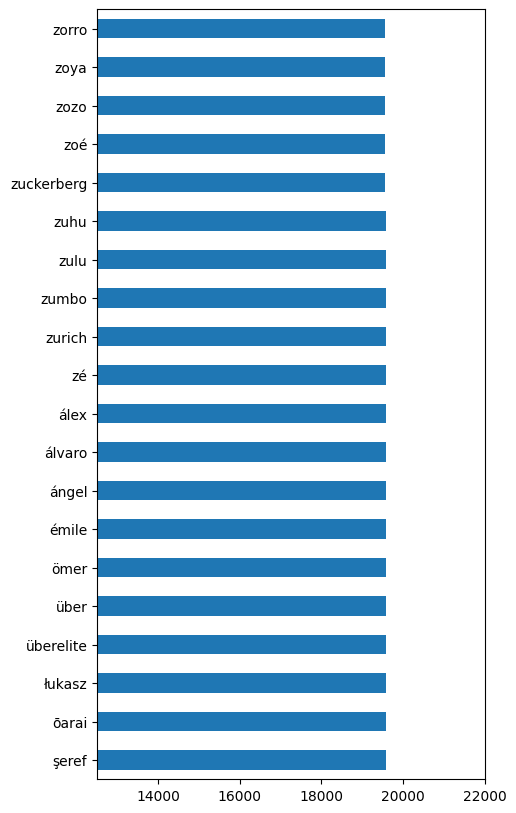

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10),xlim=(12500,22000))

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
df_2['description'] = df_2['description'].apply(stemming)
df_2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,Adults,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,Adults,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,Adults,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,Teens,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,Teens,2020,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",genet professor experi treatment comatos siste...,Adults,2017,7
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies",aw accid coupl admit grisli hospit separ must ...,Adults,2020,6
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,one high school student attack dedic teacher t...,Adults,2019,11
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies",doctor goe miss psychiatrist wife treat bizarr...,Teens,2019,4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",architect wife move castl slate becom luxuri h...,Adults,2017,12


In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(max_features=5000)

# fit the vectorizer using the text data
tfid_vectorizer.fit(df_2['description'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
X_tfidf = tfid_vectorizer.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

<Axes: >

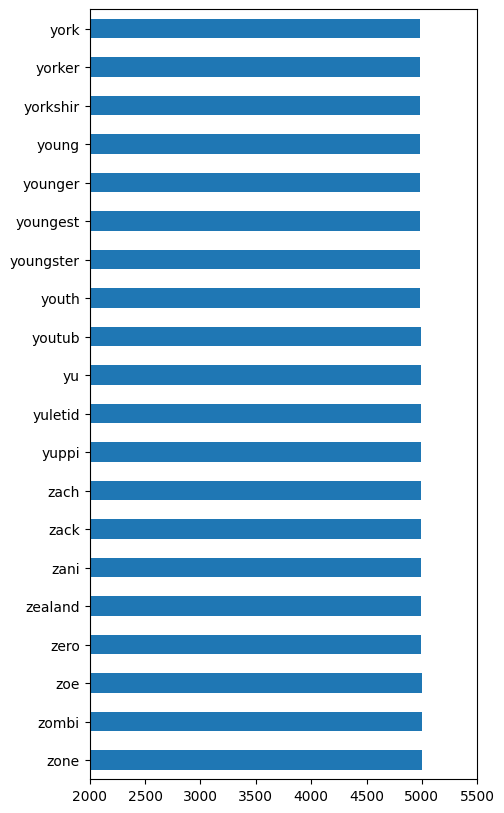

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (2000, 5500))

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [ ]:
# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X)
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X)
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)

(7770, 3218)


##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

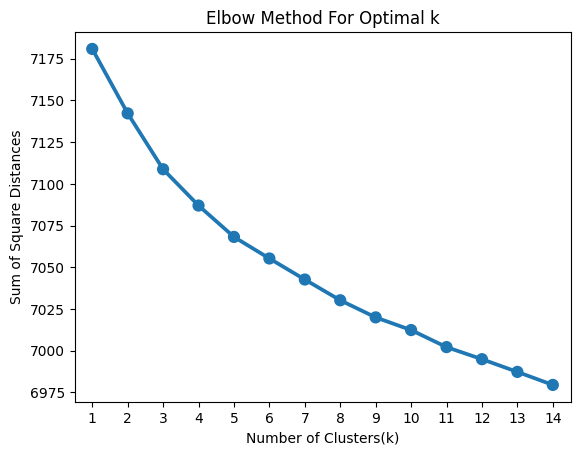

In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_transformed)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette=[]
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_transformed)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X_transformed, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.004964716831906186
For n_clusters = 3, silhouette score is 0.005761638825958618
For n_clusters = 4, silhouette score is 0.006141977435377708
For n_clusters = 5, silhouette score is 0.0064496200696935214
For n_clusters = 6, silhouette score is 0.00594840547791162
For n_clusters = 7, silhouette score is 0.006011555388477081
For n_clusters = 8, silhouette score is 0.005369610282014182
For n_clusters = 9, silhouette score is 0.00591796190214667
For n_clusters = 10, silhouette score is 0.005663814963720028
For n_clusters = 11, silhouette score is 0.005802399235366893
For n_clusters = 12, silhouette score is 0.005553495986419718
For n_clusters = 13, silhouette score is 0.005543149471683061
For n_clusters = 14, silhouette score is 0.005951438119355531
For n_clusters = 15, silhouette score is 0.005966569997955161


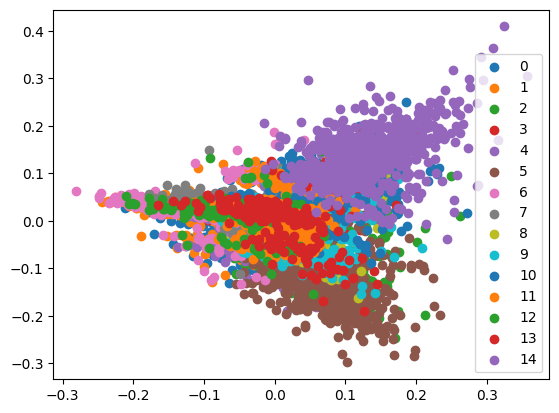

In [ ]:
# Get unique labels from the predictions
unique_labels = np.unique(preds)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[preds == i, 0], X_transformed[preds == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()

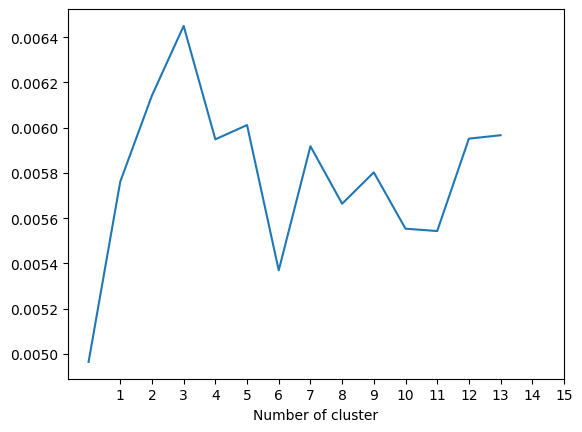

In [ ]:
plt.plot(silhouette)
plt.xticks(list(range(1,16)),list(range(1,16)))
plt.xlabel('Number of cluster')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

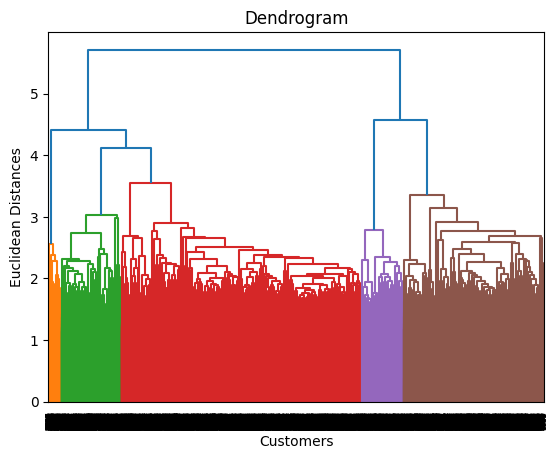

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

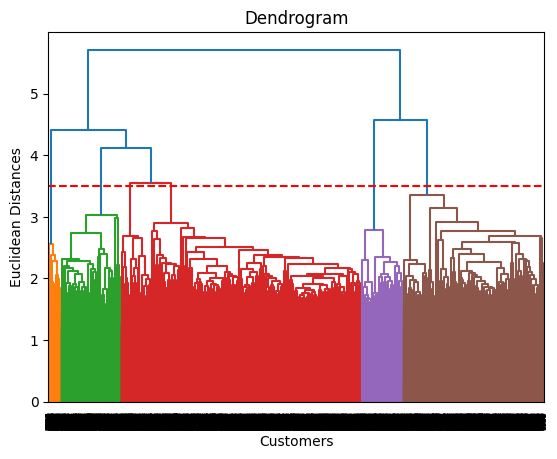

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=3.5, color='r', linestyle='--')
plt.show()

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
hc.fit(X_transformed)
y_hc = hc.fit_predict(X_transformed)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = hc.labels_
df_hierarchical.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,month_added,cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,2020,8,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016,12,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018,12,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017,11,4
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020,1,4


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1) TV-MA rating which is for the adult age group has the maximum count among both types of netflix content.

2) Raul Campos and Jan Suter are the topmost director considering the count of movies.

3) Anupam Kher is the topmost actor considering the count of movies in which Anupam Kher acted.

4) United States produces TV shows and movies which are in majority that is the count is highest and also the releases in the recent year is highest in United States.

5) Upto year 2019 the movies added were increasing but from 2020 the movies added were declining may be due to pandemic.

6) Upto year 2020 the TV shows added were increasing but from 2021 TV shows added were declining may be due to pandemic.

7) The Last three months of the year and starting one month of the year has the highest count of movies added.

8) The last month of the year has the highest count of TV shows added.

9) The documentary content has the highest count.

10) Movies around 90 min duration have the majority of count.

11) NC-17 rating movies which is for adults, the duration of movies is maximum.

12) Movies rated for kids and older kids are not atleast two hours long.

13) The duration which is more than 90 mins are movies.

14) The number of movies which is optimal is 6.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***